In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.shape

(319795, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.describe

<bound method NDFrame.describe of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex 

In [6]:
#Duplicate Treatment

In [7]:
df.duplicated().sum()

np.int64(18078)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#Missing Value 
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

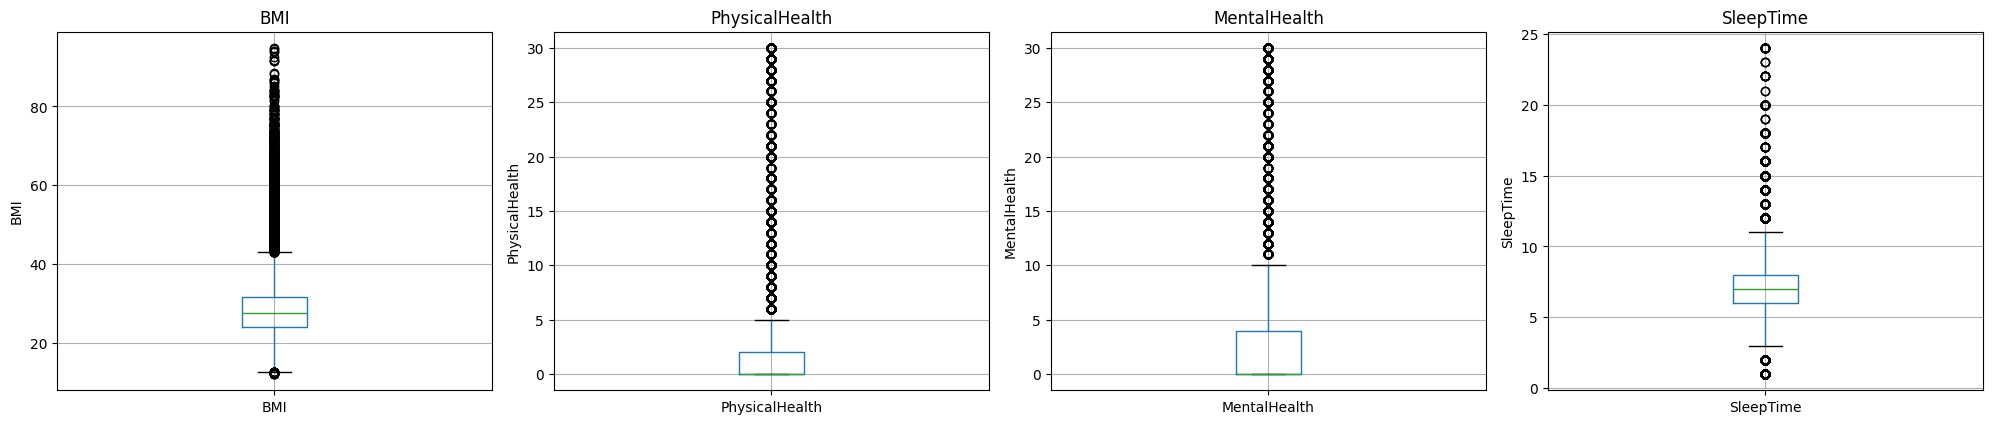

In [10]:
#Checking For Outliers
plt.figure(figsize=(25, 20))
num_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [11]:
#Removing Outliers
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

for i in num_cols:
    lower,upper=remove_outlier(df[i])
    df[i]=np.where(df[i]<lower,lower,df[i])
    df[i]=np.where(df[i]>upper,upper,df[i])

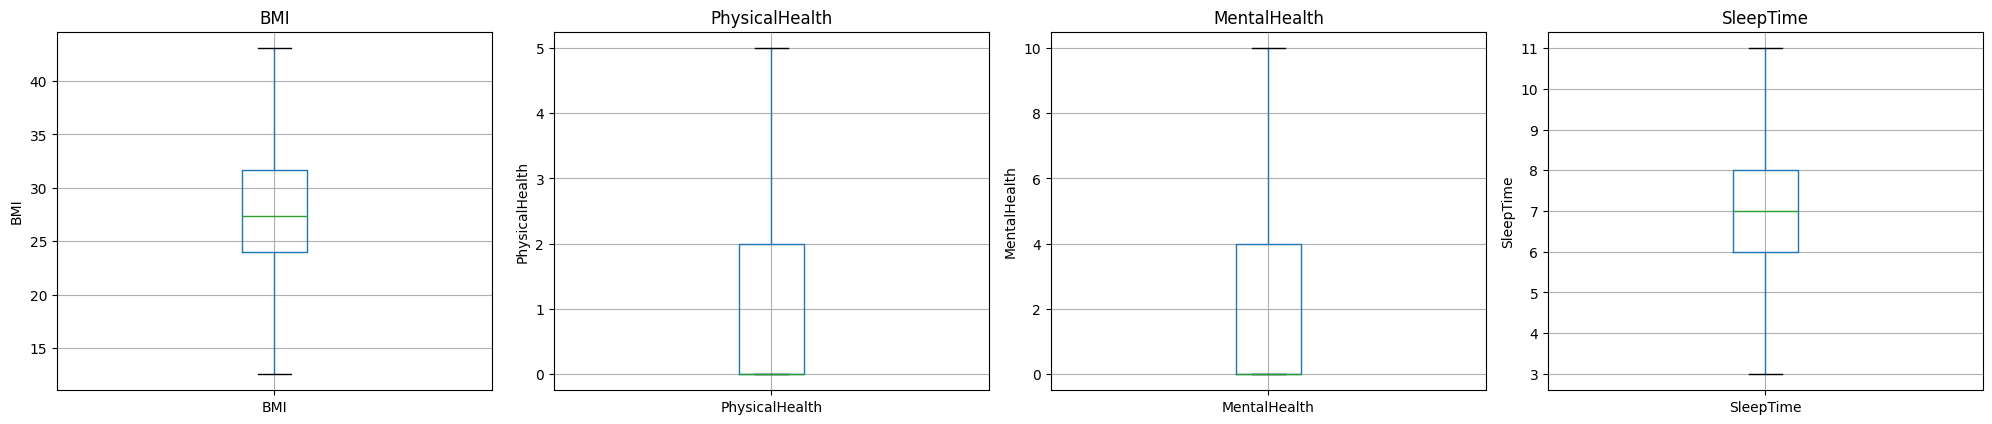

In [12]:
#Checking For Outliers After Treatment
plt.figure(figsize=(25, 20))
num_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()


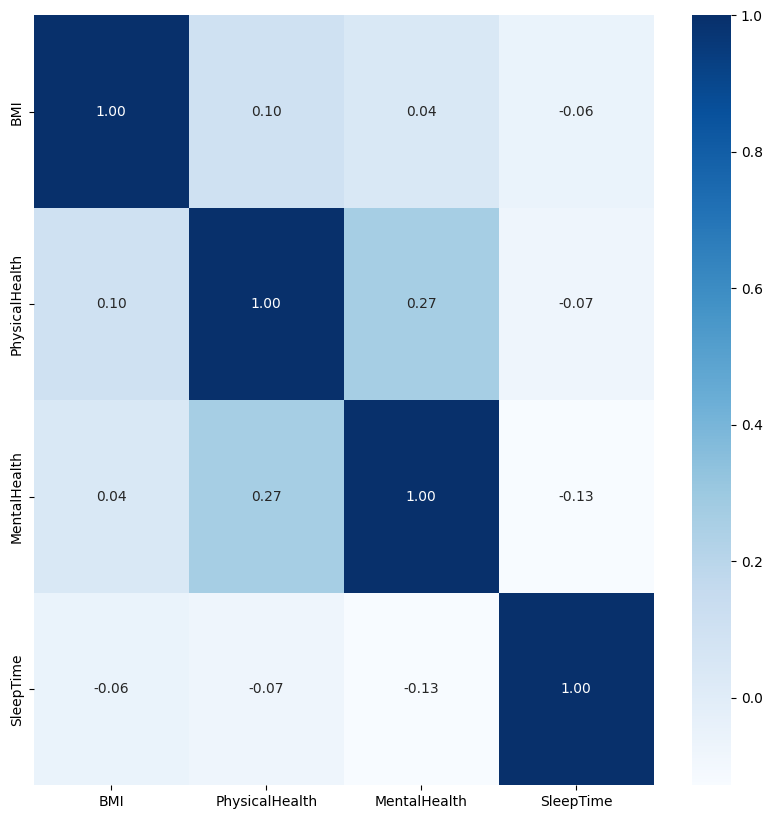

In [13]:
#Plotting Correlation Matrix

num_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,10))
sns.heatmap(num_cols.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()

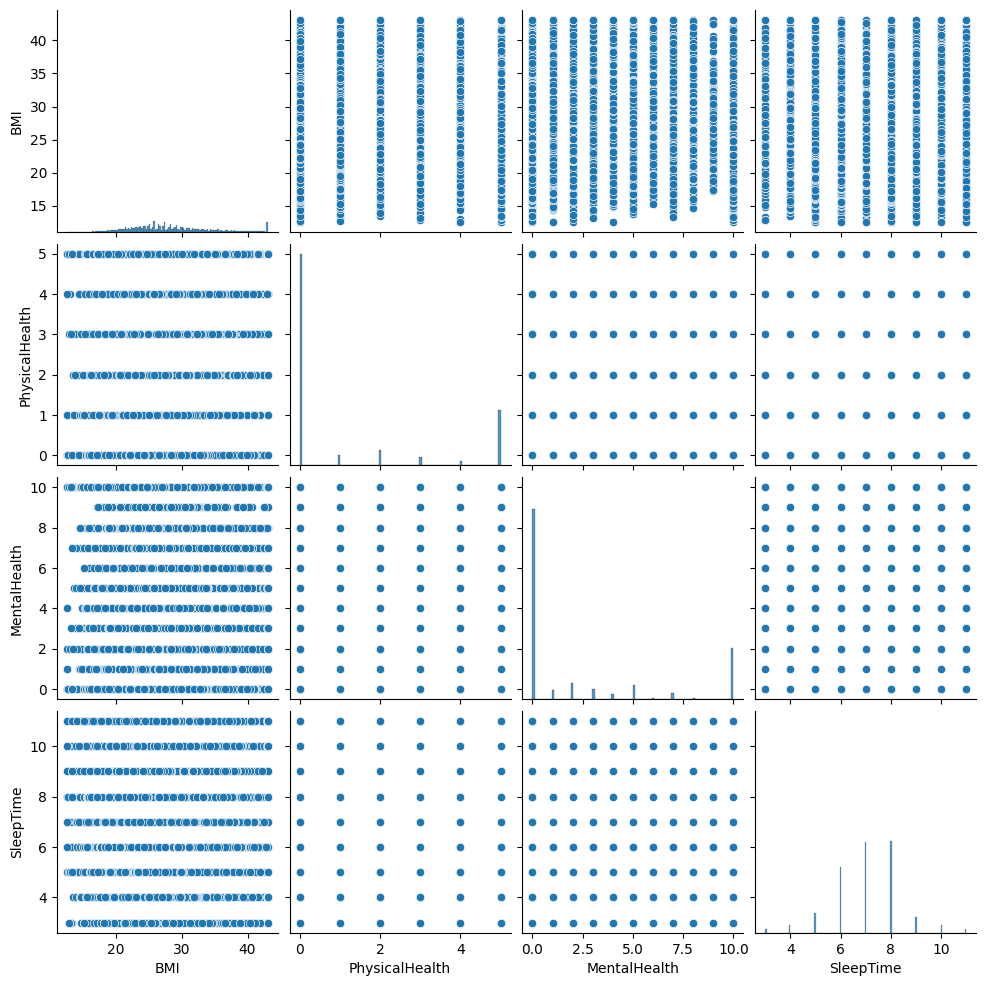

In [14]:
# Data Visualization Through Pairplot

sns.pairplot(df)
plt.show()

In [15]:
#Encoding All Categorical Columns

cat_cols = df.select_dtypes(include='object').columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  int64  
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     301717 

In [16]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,10.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,5.0,10.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,5.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [17]:
#Creating Target Variable!
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [18]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((211201, 17), (90516, 17), (211201,), (90516,))

In [19]:
#Using Standard Scaler For Feature Scaling
from sklearn.preprocessing import StandardScaler
# Save column names and indices before scaling
columns = X_train.columns
train_index = X_train.index
test_index = X_test.index

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=columns, index=train_index)
X_test = pd.DataFrame(X_test_scaled, columns=columns, index=test_index)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((211201, 17), (90516, 17), (211201,), (90516,))

In [20]:
X_train.head()
X_test.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
227657,2.506459,1.170326,-0.277837,-0.203708,-0.602681,-0.638320,-0.414640,1.059157,-0.419418,0.513589,-0.432498,-1.795438,-0.144979,1.437339,-0.405113,-0.200893,-0.327506
122384,-0.411586,-0.854463,-0.277837,-0.203708,-0.092904,-0.373797,-0.414640,1.059157,-0.419418,0.513589,-0.432498,0.556967,-1.468592,-0.796121,-0.405113,-0.200893,-0.327506
191497,-0.137385,1.170326,-0.277837,-0.203708,-0.602681,-0.638320,-0.414640,-0.944147,1.531199,0.513589,2.301329,-1.795438,-0.144979,0.692852,-0.405113,-0.200893,-0.327506
176832,1.025433,1.170326,-0.277837,-0.203708,-0.602681,-0.638320,-0.414640,-0.944147,-0.976737,0.513589,-0.432498,0.556967,1.178634,-0.051634,-0.405113,-0.200893,-0.327506
67905,-0.531761,-0.854463,-0.277837,-0.203708,-0.602681,2.006914,2.411733,-0.944147,0.695220,-2.723200,-0.432498,0.556967,-1.468592,0.692852,-0.405113,-0.200893,-0.327506


In [21]:
# Building Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,                #The number of trees in the forest.
    max_depth=None,                  #The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2,             #The minimum number of samples required to split an internal node
    min_samples_leaf=1,              #The minimum number of samples required to be at a leaf node.
    max_features='sqrt',             #The number of features to consider when looking for the best split
    class_weight=None,               #Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
    random_state=42                  #Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
)


In [22]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 89.82%



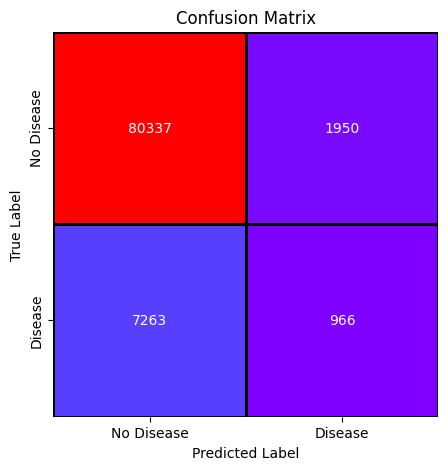

In [23]:
# Model Evaluation and Confusion Matrix Visualization
from sklearn.metrics import accuracy_score, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%\n')

conf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['No Disease', 'Disease'] if set(np.unique(y_test)) == {0, 1} else np.unique(y_test)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rainbow', cbar=False,
            xticklabels=class_names, yticklabels=class_names, linewidths=1, linecolor='black', square=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()







In [24]:
TP=conf_matrix[0][0]
TN=conf_matrix[1][1]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]



print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ',FP)

print('\nFalse Negatives(FN) = ', FN)


True Positives(TP) =  80337

True Negatives(TN) =  966

False Positives(FP) =  1950

False Negatives(FN) =  7263


In [25]:
print('Sensitivity =' , TP/(TP+FN))
print('Specificity =' , TN/(TN+FP))
print('Precision =' , TP/(TP+FP))
print('Negative Predictive Value =', TN/(TN+FN))
print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))

Sensitivity = 0.9170890410958904
Specificity = 0.33127572016460904
Precision = 0.9763024536074957
Negative Predictive Value = 0.11738971928545389
Accuracy = 0.898216889831632


In [ ]:
# Hyperparameter Tuning Using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],                # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Min samples at a leaf node
    'max_features': ['sqrt', 'log2', None],         # Number of features to consider at each split
    'class_weight': ['balanced', None]              # Weights associated with classes
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

Train Accuracy with tuned model: 
Test Accuracy with tuned model: 
5

In [29]:
# Selecting best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_train_pred_tuned = best_model.predict(X_train)
y_test_pred_tuned = best_model.predict(X_test)


print("Train Accuracy with tuned model: ", accuracy_score(y_train, y_train_pred_tuned))
print("Test Accuracy with tuned model: ", accuracy_score(y_test, y_test_pred_tuned))

conf_matrix = confusion_matrix(y_test, y_test_pred_tuned)
class_names = ['No Disease', 'Disease'] if set(np.unique(y_test)) == {0, 1} else np.unique(y_test)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rainbow', cbar=False,
            xticklabels=class_names, yticklabels=class_names, linewidths=1, linecolor='black', square=True)
plt.title(' Tuned Confusion Matrix ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
#After Tuning

TP=conf_matrix[0][0]
TN=conf_matrix[1][1]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]

print('\nTrue Positives(TP) = ', TP)
print('\nTrue Negatives(TN) = ', TN)
print('\nFalse Positives(FP) = ',FP)
print('\nFalse Negatives(FN) = ', FN)


print('Sensitivity =' , TP/(TP+FN))
print('Specificity =' , TN/(TN+FP))
print('Precision =' , TP/(TP+FP))
print('Negative Predictive Value =', TN/(TN+FN))
print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))

NameError: name 'conf_matrix' is not defined

In [ ]:
#save the tuned model using joblib
import joblib

joblib.dump(best_model, "best_random_forest.joblib")


In [ ]:
#Initialize GridSearchCv
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,                    # Use 3-fold cross-validation
    n_jobs=-1,               # Use all available cores
    verbose=1    )           # Print progress

#Fit GridSearchCv to training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
